In [444]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import itertools
from collections import Counter
import nltk
import seaborn as sns

In [6]:
data = pd.read_csv('Classified_data_combined.csv')
data = data.drop(['Unnamed: 0','Unnamed: 0.1','sheet_number'],axis=1)

In [9]:
data.columns

Index(['Answer', 'Answered_On', 'Classification', 'Occupation', 'Profile_Link',
       'User_Name', 'question'],
      dtype='object')

In [305]:
data['Classification'] = data['Classification'].map({0:'Non Spam',1:'Spam',2:'Marketing'})

In [306]:
data = data[['User_Name','Occupation', 'Profile_Link', 'question','Answer', 'Answered_On', 'Classification']]

In [307]:
data['Classification'].value_counts(normalize=True)

Spam         0.692893
Non Spam     0.189086
Marketing    0.118020
Name: Classification, dtype: float64

In [308]:
all_answers = data['Answer']
all_answers = all_answers.str.replace('[^a-zA-Z0-9 ]',' ')

In [309]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
custom_stop = ['learning','data','like','get','tools',
               'learn','course','courses','training','big','online','career','industry','science','hadoop']
for i in custom_stop:
    stop_words.add(i)

In [310]:
cleaned_answers = []
for answer in all_answers:
    stop_words_removed = [w for w in nltk.word_tokenize(answer.lower()) if w not in stop_words]
    answer_joined = ' '.join(stop_words_removed)
    cleaned_answers.append(answer_joined)

In [311]:
data['Cleaned_Answers'] = cleaned_answers

C:\Users\Goutham\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


****

### Feature Engineerinng

**1. Length of answers for each type of review**

In [312]:
data['Answer_Length'] = data['Cleaned_Answers'].apply(lambda x: len(x))

C:\Users\Goutham\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [313]:
data.groupby('Classification').mean()['Answer_Length']

Classification
Marketing    1535.032258
Non Spam      846.154362
Spam         1141.591575
Name: Answer_Length, dtype: float64

**2. Number of unique words in each answer.**

In [320]:
def unique_words(answer):
    answer_tokenized = nltk.tokenize.word_tokenize(answer)
    counts = Counter(answer_tokenized)
    return(len(counts))

In [321]:
data['Unique_Words'] = data['Cleaned_Answers'].apply(unique_words)

C:\Users\Goutham\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [322]:
data.groupby('Classification').mean()['Unique_Words']

Classification
Marketing    148.537634
Non Spam      81.838926
Spam         106.844322
Name: Unique_Words, dtype: float64

**3. Most common words**

In [190]:
all_ones,all_twos,all_zeros = [],[],[]
ones = [nltk.tokenize.word_tokenize(w) for w in data[data['Classification'] == 1]['Cleaned_Answers']]
twos = [nltk.tokenize.word_tokenize(w) for w in data[data['Classification'] == 2]['Cleaned_Answers']]
zeros = [nltk.tokenize.word_tokenize(w) for w in data[data['Classification'] == 0]['Cleaned_Answers']]

In [191]:
for i in ones:
    all_ones.extend(i)
for i in twos:
    all_twos.extend(i)
for i in zeros:
    all_zeros.extend(i)

In [192]:
ones_count = Counter(all_ones)
twos_count = Counter(all_twos)
zeros_count = Counter(all_zeros)

In [193]:
pd.Series(ones_count).sort_values(ascending=False)[:10]

analytics     1011
best           690
institute      599
time           467
one            459
also           449
program        406
experience     371
help           365
real           360
dtype: int64

In [194]:
pd.Series(twos_count).sort_values(ascending=False)[:10]

analytics    232
best         162
program      160
real         130
get          119
business     114
one          108
would        102
like          91
also          89
dtype: int64

In [195]:
pd.Series(zeros_count).sort_values(ascending=False)[:10]

analytics      217
best           134
get            125
institute      106
like            98
also            86
one             84
information     84
business        81
time            78
dtype: int64

**4. Repetition in the sentences**

In [323]:
data['Repetition_Ratio'] = data['Answer_Length'] / data['Unique_Words']

C:\Users\Goutham\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [324]:
data.groupby('Classification').mean()['Repetition_Ratio']

Classification
Marketing    9.886790
Non Spam     9.093657
Spam         9.754139
Name: Repetition_Ratio, dtype: float64

**5. Phone Numbers**

In [325]:
data['Phone_Number_Yes'] = data['Cleaned_Answers'].str.contains('\d{10}|\d{11}')

C:\Users\Goutham\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [326]:
data.groupby(['Classification','Phone_Number_Yes'],as_index=False).count()[['Classification','Phone_Number_Yes','User_Name']]

,Classification,Phone_Number_Yes,User_Name
0,Marketing,False,89
1,Marketing,True,4
2,Non Spam,False,144
3,Non Spam,True,5
4,Spam,False,450
5,Spam,True,96


**6. Insitution Names Count** <br>
Known Institutions - Besant, acadgild, imarticus, simplilearn, dataflair, evarcity, techstack, intellipaat, madrid

In [344]:
institutions = ['besant', 'acadgild', 'imarticus', 'simplilearn', 'dataflair', 'evarcity', 'techstack', 'intellipaat', 'madrid',
               'sp jain global','digital vidya','jigsaw','learnbay']
answers = data['Answer'].str.lower()

In [251]:
'''for i in answers[:5]:
    insti_count = {}
    for j in institutions:
        insti_count[j] = i.count(j)
    for i in insti_count:
        if insti_count[i] == max(insti_count.values()):
            print(i,insti_count[i])
            break'''

'for i in answers[:5]:\n    insti_count = {}\n    for j in institutions:\n        insti_count[j] = i.count(j)\n    for i in insti_count:\n        if insti_count[i] == max(insti_count.values()):\n            print(i,insti_count[i])\n            break'

In [409]:
def max_institution_counts(x):
    insti_count = {}
    for j in institutions:
        insti_count[j] = x.count(j)
    for i in insti_count:
        if insti_count[i] == max(insti_count.values()):
            return([i,insti_count[i]])

In [410]:
data['Max_Institution_Count'] = data['Answer'].str.lower().apply(max_institution_counts)

In [411]:
def total_institution_mentions(x):
    total_mentions = 0
    for j in institutions:
        total_mentions += x.count(j)
        #print(j,x.count(j))
    return(total_mentions)

In [412]:
data['Total_Institution_Mentions'] = data['Answer'].str.lower().apply(total_institution_mentions)

In [349]:
data.groupby('Classification').mean()['Max_Institution_Count']

Classification
Marketing    0.741935
Non Spam     0.402685
Spam         1.025641
Name: Max_Institution_Count, dtype: float64

In [350]:
data[(data['Max_Institution_Count'] != 0) & (data['Classification'] == 0)]
data['Answer'].iloc[762]

'Hey, You asked here What are some good Hadoop and big data training institutes in Delhi and NCR?List of Best Hadoop and Big Data Training institutes in Delhi and NCR are:-Techstack | #1 Big Data Institute in Delhi NCRSimplilearnEdurekaIntellipaatDataFlairAccording to Google Results and Previous Student’s feedback, Techstack is the best hadoop and big data training institute in Delhi and NCR. I have done lots of research from various MNC in which Hadoop and Big Data process is there like JustDial, Sapient, IBM, etc.. and guess what i have found that they hired most of students from Techstack institute directly.What Techstack says about their hadoop and big data training?We are not looking here for money while giving training to students as much as we want that students can learn in depth. For this, we have made our training process very clear about practicals, projects and assessments. We have to push hard them to get best and we are proud that we are doing good still.- Prashant Gangwa

In [413]:
data.to_csv('new_data.csv',index=False)
new_data = pd.read_csv('new_data.csv')

In [414]:
new_data.groupby(['Classification','Phone_Number_Yes'],as_index=False).count()[['Classification','Phone_Number_Yes','User_Name']]

,Classification,Phone_Number_Yes,User_Name
0,Marketing,False,89
1,Marketing,True,4
2,Non Spam,False,144
3,Non Spam,True,5
4,Spam,False,450
5,Spam,True,96


In [415]:
new_data.columns

Index(['User_Name', 'Occupation', 'Profile_Link', 'question', 'Answer',
       'Answered_On', 'Classification', 'Cleaned_Answers', 'Answer_Length',
       'Unique_Words', 'Repetition_Ratio', 'Phone_Number_Yes',
       'Max_Institution_Count', 'Total_Institution_Mentions'],
      dtype='object')

Int64Index([757, 756, 255, 748, 769, 767, 759, 762, 490, 537], dtype='int64')


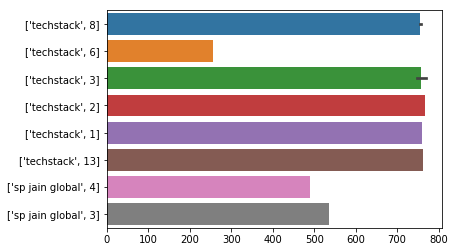

In [552]:
tot_mentions = new_data['Max_Institution_Count'].sort_values(ascending=False)[:10]
x = tot_mentions.keys()
y = pd.Series(tot_mentions.values)
print(x)
sns.barplot(x,y)
plt.show()

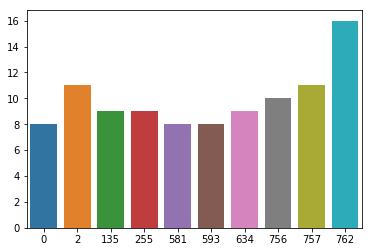

In [522]:
tot_mentions = new_data['Total_Institution_Mentions'].sort_values(ascending=False)[:10]
x = tot_mentions.keys()
y = tot_mentions.values
sns.barplot(x,y)

In [524]:
new_data.iloc[x]

,User_Name,Occupation,Profile_Link,question,Answer,Answered_On,Classification,Cleaned_Answers,Answer_Length,Unique_Words,Repetition_Ratio,Phone_Number_Yes,Max_Institution_Count,Total_Institution_Mentions
762,Madhu Tivari,", lives in New Delhi (2010-present)",https://www.quora.com/profile/Madhu-Tivari,https://www.quora.com/What-are-some-good-Hadoo...,"Hey, You asked here What are some good Hadoop ...","Updated Jul 17, 2018",Non Spam,hey asked good institutes delhi ncr list best ...,1862,166,11.216867,True,"['techstack', 13]",16
2,Sunil,", Digital Marketing Executive at Self-Employme...",https://www.quora.com/profile/Sunil-677,https://www.quora.com/Which-institute-is-best-...,Here are Top 10 institutes that offer best Dat...,"Updated Oct 12, 2018",Spam,top 10 institutes offer best delhi madrid soft...,3574,325,10.996923,False,"['madrid', 8]",11
757,Techstack Institute,NaN,https://www.quora.com/profile/Techstack-Institute,https://www.quora.com/What-are-some-good-Hadoo...,TechstackHello Friend My name is **Vikram**. I...,"Answered Aug 8, 2017",Spam,techstackhello friend name vikram working expe...,3348,316,10.594937,True,"['techstack', 8]",11
756,Aditya Singh Rathore,", lives in New Delhi",https://www.quora.com/profile/Aditya-Singh-Rat...,https://www.quora.com/What-are-some-good-Hadoo...,"Hello Friend, My name is Aditya and i am worki...","Updated Aug 10, 2018",Non Spam,hello friend name aditya working digital marke...,8555,649,13.181818,False,"['techstack', 8]",10
255,Techstack Institute,NaN,https://www.quora.com/profile/Techstack-Institute,https://www.quora.com/Which-is-best-institute-...,Hello Friend My name is RAHUL. I am working as...,"Answered Aug 8, 2017",Spam,hello friend name rahul working consultant gur...,507,56,9.053571,False,"['techstack', 6]",9
634,Abhinav Krishnan,", lives in Bengaluru, Karnataka, India (2010-p...",https://www.quora.com/profile/Abhinav-Krishnan-17,https://www.quora.com/Which-is-a-good-training...,Bangalore is the Silicon Valley of India. Sinc...,"Updated Jul 29, 2018 · Author has 163 answers ...",Marketing,bangalore silicon valley india since analytics...,1828,200,9.140000,False,"['imarticus', 3]",9
135,Anonymous,", 5 years experience in Hadoop,Data Science,Sp...",https://www.quora.com/Which-institute-is-best-...,https://www.quora.com/Which-institute-is-best-...,"Being an IT hub, I can figure out that you wil...","Answered Nov 5, 2018 · Author has 164 answers ...",Spam,hub figure get large number institutes providi...,1410,139,10.143885,False,"['intellipaat', 9]",9
0,Kapil Nakra,", Cofounder at Digital Vidya",https://www.quora.com/profile/Kapil-Nakra,https://www.quora.com/Which-institute-is-best-...,How to choose the right data science / analyti...,"Updated Jul 23, 2018 · Author has 614 answers ...",Marketing,choose right analytics framework encompassing ...,2805,275,10.200000,False,"['digital vidya', 4]",8
593,Vidita Mehta,", lives in Mumbai, Maharashtra, India",https://www.quora.com/profile/Vidita-Mehta-1,https://www.quora.com/Which-is-a-better-instit...,"Hi,I am glad that you’re choosing one of the m...","Answered Jun 7, 2018 · Author has 987 answers ...",Spam,hi glad choosing one booming careers technolog...,1115,118,9.449153,False,"['imarticus', 8]",8
581,Vidita Mehta,", lives in Mumbai, Maharashtra, India",https://www.quora.com/profile/Vidita-Mehta-1,https://www.quora.com/Which-is-the-best-instit...,"Hi,I am glad that you’re choosing one of the m...","Updated Jun 7, 2018 · Author has 987 answers a...",Spam,hi glad choosing one booming careers technolog...,1125,119,9.453782,False,"['imarticus', 8]",8
